In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

In [2]:
# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
y.shape

(150,)

In [3]:
print(np.size(X),np.size(y))

600 150


In [4]:
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]
y.shape

(150, 3)

In [9]:
# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]


In [10]:
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

In [34]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
#print(y_score)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
roc_auc

print(roc_auc)
print(y_score)

{0: 0.9118165784832452, 1: 0.6029629629629629, 2: 0.7859477124183007, 'micro': 0.7274666666666667}
[[-0.76305896 -0.36472635  0.1239796 ]
 [-0.20238399 -0.63148982 -0.16616656]
 [ 0.11808492 -0.80262259 -0.32062486]
 [-0.90750303 -0.1239792   0.02184016]
 [-0.01108555 -0.27918155 -0.71882525]
 [-0.60521037 -0.34728075 -0.05851787]
 [ 0.02264569 -0.24507866 -0.79094201]
 [-0.61115098  0.1827259  -0.57154703]
 [-0.37590649 -0.24062697 -0.38892819]
 [-0.47019698 -0.25733679 -0.27501927]
 [-0.42194767 -0.30275351 -0.28027547]
 [-0.33545871 -0.70306393  0.02538619]
 [-0.22711497 -0.64064389 -0.13452752]
 [-0.07836815 -0.46342889 -0.45930643]
 [-0.533757   -0.26521263 -0.20026826]
 [ 0.09973063 -0.55326984 -0.56156984]
 [-0.71354879 -0.04231832 -0.24317009]
 [-0.55067912 -0.13785396 -0.31413579]
 [ 0.37989555 -0.99673681 -0.3909524 ]
 [-0.11088917 -0.91357544  0.03129667]
 [-0.70721114 -0.06430956 -0.21412904]
 [-0.02407429 -0.45895598 -0.51928682]
 [-0.25004251 -0.80100991  0.04076059]
 [ 0

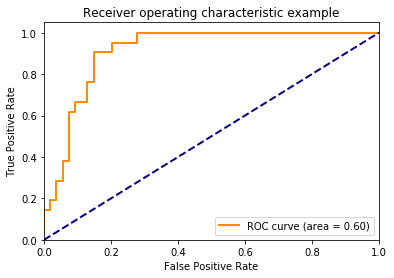

In [38]:
#plot roc
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [105]:
fpr

{0: array([0.        , 0.        , 0.01851852, 0.01851852, 0.03703704,
        0.03703704, 0.05555556, 0.05555556, 0.07407407, 0.07407407,
        0.09259259, 0.09259259, 0.12962963, 0.12962963, 0.14814815,
        0.14814815, 0.2037037 , 0.2037037 , 0.27777778, 0.27777778,
        1.        ]),
 1: array([0.        , 0.        , 0.02222222, 0.02222222, 0.11111111,
        0.11111111, 0.17777778, 0.17777778, 0.2       , 0.2       ,
        0.24444444, 0.24444444, 0.26666667, 0.26666667, 0.37777778,
        0.37777778, 0.42222222, 0.42222222, 0.48888889, 0.48888889,
        0.57777778, 0.57777778, 0.62222222, 0.62222222, 0.64444444,
        0.64444444, 0.66666667, 0.66666667, 0.73333333, 0.73333333,
        0.75555556, 0.75555556, 0.88888889, 0.88888889, 1.        ]),
 2: array([0.        , 0.        , 0.01960784, 0.01960784, 0.07843137,
        0.07843137, 0.09803922, 0.09803922, 0.11764706, 0.11764706,
        0.1372549 , 0.1372549 , 0.15686275, 0.15686275, 0.17647059,
        0.17647

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn import svm

In [40]:
x = [1, 5, 1.5, 8, 1, 9]
y = [2, 8, 1.8, 8, 0.6, 11]

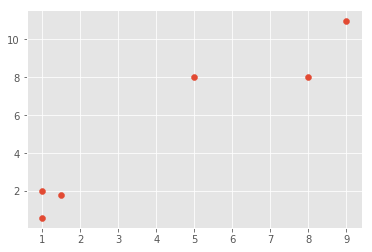

In [41]:
plt.scatter(x,y)
plt.show()

In [47]:
X = np.array([[1,2],
             [5,8],
             [1.5,1.8],
             [8,8],
             [1,0.6],
             [9,11]])

X.shape
#X = X.reshape(-2,1)


print(np.array([[0.58,0.76]]))

[[0.58 0.76]]


In [52]:
y = np.array([0,1,0,1,0,1])
#y = np.asarray(y)
y.shape

(6,)

In [53]:
clf = svm.SVC(kernel='linear') # Linear Kernel

In [54]:
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

[0.1380943  0.24462418]


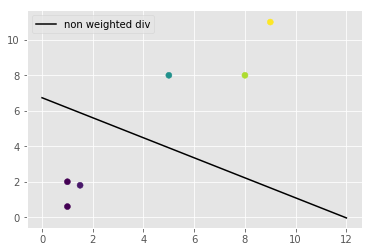

In [55]:
clf.predict([[0.58,0.76]])
clf.predict([[10,10]])

w = clf.coef_[0]
print(w)

a = -w[0] / w[1]

xx = np.linspace(0,12)
yy = a * xx - clf.intercept_[0] / w[1]

h0 = plt.plot(xx, yy, 'k-', label="non weighted div")

plt.scatter(X[:, 0], X[:, 1],c=x)
plt.legend()
plt.show()

[[0, 0], [1, 1]]

In [205]:
y = [0, 1]

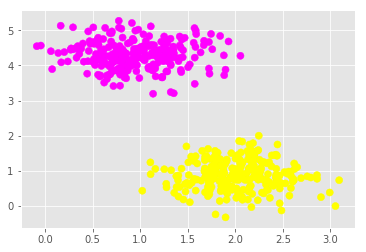

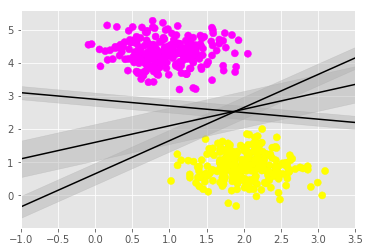

In [56]:
# importing scikit learn with make_blobs 
from sklearn.datasets.samples_generator import make_blobs 
  
# creating datasets X containing n_samples 
# Y containing two classes 
X, Y = make_blobs(n_samples=500, centers=2, 
                  random_state=0, cluster_std=0.40) 
  
# plotting scatters  
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring'); 
plt.show()  

    
xfit = np.linspace(-1, 3.5) 
  
# plotting scatter 
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring') 
  
# plot a line between the different sets of data 
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]: 
    yfit = m * xfit + b 
    plt.plot(xfit, yfit, '-k') 
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',  
    color='#AAAAAA', alpha=0.4) 
  
plt.xlim(-1, 3.5); 
plt.show() 

In [242]:
Y

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,

In [263]:
print(digits.data)

NameError: name 'digits' is not defined

In [372]:
cancer = datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109) # 70% training and 30% test
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [369]:
X_test[1]

array([[1.167e+01, 2.002e+01, 7.521e+01, ..., 8.120e-02, 3.206e-01,
        8.950e-02],
       [1.194e+01, 1.824e+01, 7.571e+01, ..., 6.296e-02, 2.785e-01,
        7.408e-02],
       [1.916e+01, 2.660e+01, 1.262e+02, ..., 1.872e-01, 3.258e-01,
        9.720e-02],
       ...,
       [8.219e+00, 2.070e+01, 5.327e+01, ..., 7.879e-02, 3.322e-01,
        1.486e-01],
       [9.000e+00, 1.440e+01, 5.636e+01, ..., 1.389e-02, 2.991e-01,
        7.804e-02],
       [1.286e+01, 1.332e+01, 8.282e+01, ..., 1.155e-01, 2.382e-01,
        8.553e-02]])

In [362]:
X_train.shape

(398, 30)

In [321]:
X[1]

array([5., 8.])

In [363]:
y_train.shape

(398,)

In [392]:
import numpy as np
X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
y = np.array([1, 1, 2, 2])
from sklearn.svm import SVC
clf = SVC()
clf.fit(X, y) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [408]:
#clf.decision_function(X)
clf.predict(X[0:1])

array([1])

In [409]:
X[0:1]

array([[-1, -1]])